<a href="https://colab.research.google.com/github/Alvaisari/github-slideshow/blob/main/transmission_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><div style='font-family: "serif"'> Transmission function </div></center>

<p style='text-align: justify; font-family: "serif"; font-size: 16px;'>
Usually, XPS measurements are performed with the constant energy of detected electrons inside of the analyzer (fixed analyzer transmission mode). Electrons of a specific initial kinetic energy $E_k$ are measured by setting voltages for the lens system that both focus onto the entrance slit the electrons of the required initial energy and retards their velocity so that their kinetic energy after passing through the transfer lenses matches the pass energy $E_p$ of the analyser.
<br><br>
The measured intensity depends on the collection efficiency of the receiver, i.e., on its transmission function $T(E_k, E_p)$ (=intensity/energy response function). $T(E_k, E_p)$ includes all instrumental parameters of the XPS receiver such as acceptance area, acceptance solid angle and the detection efficiency. Thus $T(E_k, E_p)$ is instrument dependent [<a href="https://doi.org/10.1016/j.elspec.2017.07.004">Trigueiro et al 2018</a>].
<br><br>
There are several methods for measuring $T(E_k, E_p)$, which are decribed in details by <a href="https://doi.org/10.1002/sia.740200302">Weng et al 1993</a>. In case of liquid jet XPS the most suitable method is one developed by <a href="https://doi.org/10.1002/sia.740170502">Carrazza and León 1991</a>. According to this method, $T(E_k, E_p)$ dependence can be evaluated from:
<br><br>
\begin{equation}
{T \sim E_p (\frac{E_p}{E_k})^{n}}
\end{equation}
<br>
where $n$ - coefficient depending on $E_k$, which needs to be found. To evaluate it from the experiment, at least two measurements of the same sample at the same $E_k$ should be performed. The expression for total recorded photoelectron signal $I$ from a specie is:
<br><br>
\begin{equation}
  I \sim \alpha F \sigma T(E_k, E_p) I_n
\end{equation}
<br>
where $\alpha$ is an experimental alignment factor, $F$ is total photon flux, $\sigma$ is photoionization cross-section, $I_n$ is normalized signal. Assuming that:
<ul style='text-align: justify; font-family: "serif"; font-size: 16px;'>
  <li>$\alpha$ is constant during the experiment</li>
  <li>total photon flux can be substituted by mirror current $I_m$ due to their proportionality</li>
  <li>$I_n$ is equal for 2 measurements of the same sample at the same $E_k$</li>
  <li>$I_n$ and $I$ can be substituted by peak areas $A_n$ and $A$</li>
</ul>
<p style='text-align: justify; font-family: "serif"; font-size: 16px;'>
we can deduce from the ratio of $I_n$ for 2 measurements and from the expression for $T(E_k, E_p)$ the coefficient $n$:
<br><br>
\begin{equation}
  n = \log{\frac{A_1 I_{m2} E_{p2}}{A_2 I_{m1} E_{p1}}} / \log{\frac{E_{p1}}{E_{p2}}} 
\end{equation}
<br>
The advantage of the method is that a knowledge of $\alpha$ and $\sigma$ nor the use of a contamination-free sample is not required.
<br><br>
Let's take an example in Python code. 3 pairs of measurements were performed on a sample with varying $E_k$ of 60 (5 and 20 eV $E_p$), 210 and 410 eV (20 and 50 eV $E_p$ in each case):

In [1]:
# Data obtained. These can be substituted by your data.
A_1 =  [213132,  1409318, 373099]  # 
A_2 =  [741699,  3995173, 1068549] #
I_m1 = [243.861, 410.884, 438.056] # mA
I_m2 = [245.856, 430.716, 437.926] # mA
E_p1 = [5,       20,      20]      # eV
E_p2 = [20,      50,      50]      # eV

import numpy as np # import library

n = [] # array for transmisson coefficient
# fill n array
for i in range(len(A_1)):
    coef_1 = (A_1[i] * I_m2[i] * E_p2[i]) / (A_2[i] * I_m1[i] * E_p1[i])
    coef_2 = E_p1[i] / E_p2[i]
    n.append(abs(
        np.log(coef_1) / np.log(coef_2)
                )
            )
# average n
n_aver = round(sum(n) / len(n), 2)

print('n values: ')
[print(round(i, 2), end =' ') for i in n]
print(f'\nAverage: {n_aver}')

n values: 
0.11 0.09 0.15 
Average: 0.11


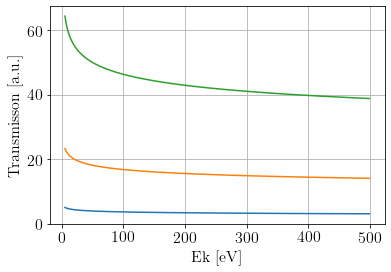

In [5]:
# now let's make plots
# more libraries
import matplotlib.pyplot as plt
from matplotlib import rc

# choosing font and text style for plots
rc('font',**{'family':'serif',
             'size':16})
rc('text', usetex=True) # use LaTeX
fig, ax = plt.subplots() # create plot space

ek = np.arange(5, 500, 1) # kinetic energy
ep = sorted(list(set(E_p1 + E_p2))) # pass energy used
for energy in ep:
    ax.plot(ek, (lambda ek: energy * (energy / ek) ** n_aver)(ek))

ax.set_ylabel('Transmisson [a.u.]')
ax.set_xlabel('Ek [eV]')
ax.grid()
# ax.grid(title=r"")
plt.show();